In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [30]:
trip_data_path = (r"C:\Users\kriti\kriti python\df_trips_202401.csv") 
trips_df = pd.read_csv(trip_data_path)

In [31]:
trips_df.head()

,PROVIDER_ID,PROVIDER_NAME,DEVICE_ID,VEHICLE_ID,VEHICLE_TYPE,PROPULSION_TYPE,TRIP_ID,TRIP_DURATION,TRIP_DISTANCE,ROUTE,...,START_TIME_RAW,END_TIME_RAW,PUBLICATION_TIME_RAW,PARKING_VERIFICATION_URL,STANDARD_COST,ACTUAL_COST,CURRENCY,GEOM_POINTS,ID,RUN_DATE
0,2411d395-04f2-47c9-ab66-d09e9e3c3251,Bird,2a22a82d-df4a-4eb8-8342-acd8050af025,69Z7M,scooter,electric,37ea4e27-18d8-411c-8f1e-b540f8488720,112,152,"{""type"":""FeatureCollection"",""features"":[{""type...",...,1704241804583,1704241917451,NaN,NaN,NaN,NaN,NaN,"{\n ""geometries"": [\n {\n ""coordinate...",3474224,NaN
1,2411d395-04f2-47c9-ab66-d09e9e3c3251,Bird,a575d1d7-e905-4cf2-8da6-e513ab93c3ce,GVMTC,scooter,electric,60036b60-a949-4740-9128-1cc363f80463,189,603,"{""type"":""FeatureCollection"",""features"":[{""type...",...,1704242618268,1704242807575,NaN,NaN,NaN,NaN,NaN,"{\n ""geometries"": [\n {\n ""coordinate...",3474225,NaN
2,2411d395-04f2-47c9-ab66-d09e9e3c3251,Bird,7b7ff31f-91e2-4c67-abef-d32ec2fa7303,6T43Q,scooter,electric,6fc11783-0bdf-42f5-8f46-130711abdd40,135,365,"{""type"":""FeatureCollection"",""features"":[{""type...",...,1704243898351,1704244033714,NaN,NaN,NaN,NaN,NaN,"{\n ""geometries"": [\n {\n ""coordinate...",3474226,NaN
3,2411d395-04f2-47c9-ab66-d09e9e3c3251,Bird,175f4435-1766-49d0-9a82-b4561eda1eeb,14QTX,scooter,electric,4c96f424-7721-4151-b55a-0db394f6ace7,1391,2484,"{""type"":""FeatureCollection"",""features"":[{""type...",...,1704242801608,1704244193380,NaN,NaN,NaN,NaN,NaN,"{\n ""geometries"": [\n {\n ""coordinate...",3474227,NaN
4,2411d395-04f2-47c9-ab66-d09e9e3c3251,Bird,2b952779-6489-46b5-8926-2b23a2fc57b8,9VYK2,scooter,electric,7a1e3086-3477-40e1-b5c5-def24d263c7c,1361,2492,"{""type"":""FeatureCollection"",""features"":[{""type...",...,1704242836780,1704244198591,NaN,NaN,NaN,NaN,NaN,"{\n ""geometries"": [\n {\n ""coordinate...",3474228,NaN


In [32]:
print("Columns in the dataset:")
print(trips_df.columns)

Columns in the dataset:
Index(['PROVIDER_ID', 'PROVIDER_NAME', 'DEVICE_ID', 'VEHICLE_ID',
       'VEHICLE_TYPE', 'PROPULSION_TYPE', 'TRIP_ID', 'TRIP_DURATION',
       'TRIP_DISTANCE', 'ROUTE', 'ACCURACY', 'START_TIME', 'END_TIME',
       'PUBLICATION_TIME', 'START_TIME_RAW', 'END_TIME_RAW',
       'PUBLICATION_TIME_RAW', 'PARKING_VERIFICATION_URL', 'STANDARD_COST',
       'ACTUAL_COST', 'CURRENCY', 'GEOM_POINTS', 'ID', 'RUN_DATE'],
      dtype='object')


In [33]:
columns_to_drop = [
    'PROVIDER_ID', 'DEVICE_ID', 'VEHICLE_ID', 'VEHICLE_TYPE', 'PROPULSION_TYPE',
    'TRIP_ID', 'TRIP_DURATION', 'TRIP_DISTANCE', 'ROUTE', 'ACCURACY',
    'START_TIME_RAW', 'END_TIME_RAW', 'END_TIME', 'PUBLICATION_TIME', 'PUBLICATION_TIME_RAW',
    'PARKING_VERIFICATION_URL', 'STANDARD_COST', 'ACTUAL_COST', 'CURRENCY',
    'GEOM_POINTS', 'ID', 'RUN_DATE'
]

In [34]:
trips_df = trips_df.drop(columns=columns_to_drop, errors='ignore')

In [35]:
trips_df['START_TIME'] = pd.to_datetime(trips_df['START_TIME'], errors='coerce')
trips_df['HOUR'] = trips_df['START_TIME'].dt.hour
trips_df['DAY_OF_WEEK'] = trips_df['START_TIME'].dt.dayofweek  # Monday=0, Sunday=6
trips_df['DAY_TYPE'] = trips_df['DAY_OF_WEEK'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

In [36]:
hourly_counts = trips_df.groupby(['DAY_TYPE', 'HOUR']).size().reset_index(name='TRIP_COUNT')

In [37]:
weekday_counts = hourly_counts[hourly_counts['DAY_TYPE'] == 'Weekday'].sort_values('HOUR')
weekend_counts = hourly_counts[hourly_counts['DAY_TYPE'] == 'Weekend'].sort_values('HOUR')

In [38]:
print("Weekday Hourly Trip Counts:")
print(weekday_counts)

Weekday Hourly Trip Counts:
   DAY_TYPE  HOUR  TRIP_COUNT
0   Weekday     6         222
1   Weekday     7         998
2   Weekday     8        1077
3   Weekday     9         781
4   Weekday    10         551
5   Weekday    11         706
6   Weekday    12        1122
7   Weekday    13        1001
8   Weekday    14        1085
9   Weekday    15        1125
10  Weekday    16        1397
11  Weekday    17        1736
12  Weekday    18        1355
13  Weekday    19        1179
14  Weekday    20        1052
15  Weekday    21        1162
16  Weekday    22           1


In [39]:
print("Weekend Hourly Trip Counts:")
print(weekend_counts)

Weekend Hourly Trip Counts:
   DAY_TYPE  HOUR  TRIP_COUNT
17  Weekend     6          30
18  Weekend     7          66
19  Weekend     8          93
20  Weekend     9         166
21  Weekend    10         316
22  Weekend    11         532
23  Weekend    12         629
24  Weekend    13         597
25  Weekend    14         792
26  Weekend    15        1175
27  Weekend    16        1097
28  Weekend    17         878
29  Weekend    18         781
30  Weekend    19         678
31  Weekend    20         622
32  Weekend    21         627
33  Weekend    22           1
34  Weekend    23           1


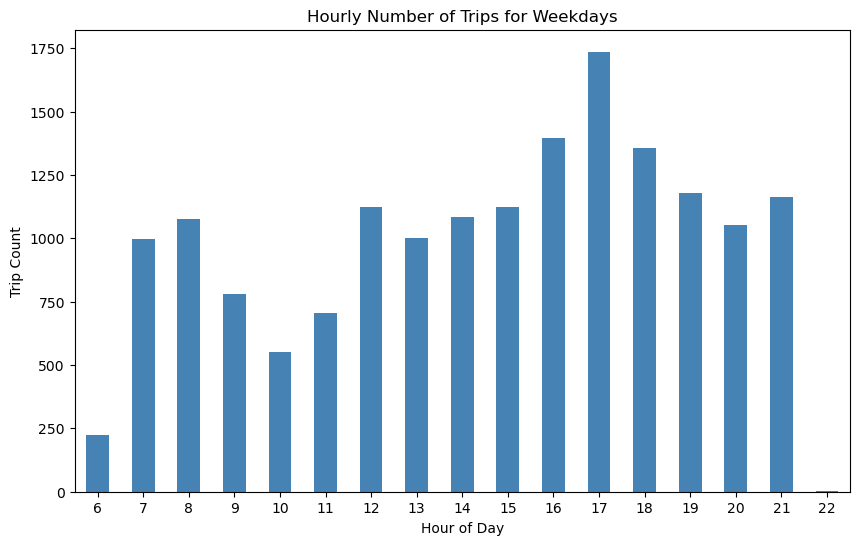

In [40]:
# Weekday Trips Histogram (Without Provider Separation)
weekday_data = trips_df[trips_df['DAY_TYPE'] == 'Weekday']
weekday_grouped = weekday_data.groupby('HOUR').size()

weekday_grouped.plot(kind='bar', color='steelblue', figsize=(10, 6))
plt.title("Hourly Number of Trips for Weekdays")
plt.xlabel("Hour of Day")
plt.ylabel("Trip Count")
plt.xticks(rotation=0)
plt.show()


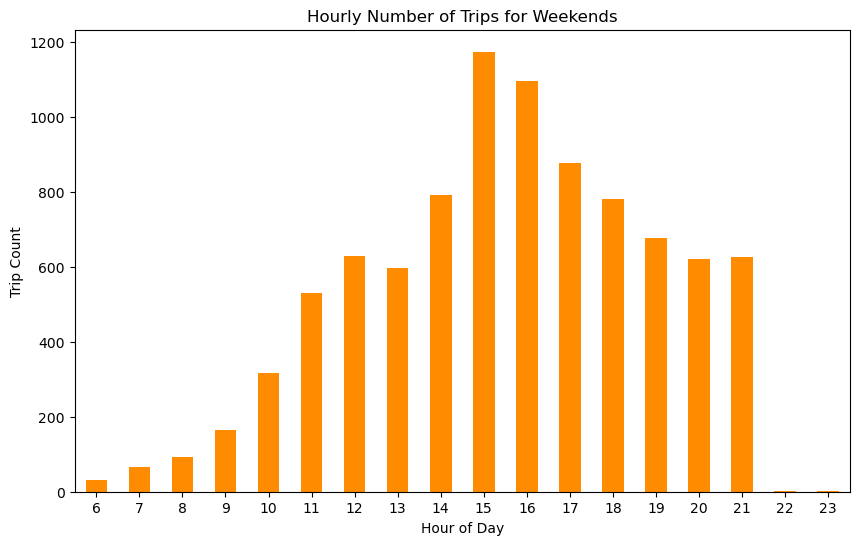

In [41]:
# Weekend Trips Histogram (Without Provider Separation)
weekend_data = trips_df[trips_df['DAY_TYPE'] == 'Weekend']
weekend_grouped = weekend_data.groupby('HOUR').size()

weekend_grouped.plot(kind='bar', color='darkorange', figsize=(10, 6))
plt.title("Hourly Number of Trips for Weekends")
plt.xlabel("Hour of Day")
plt.ylabel("Trip Count")
plt.xticks(rotation=0)
plt.show()


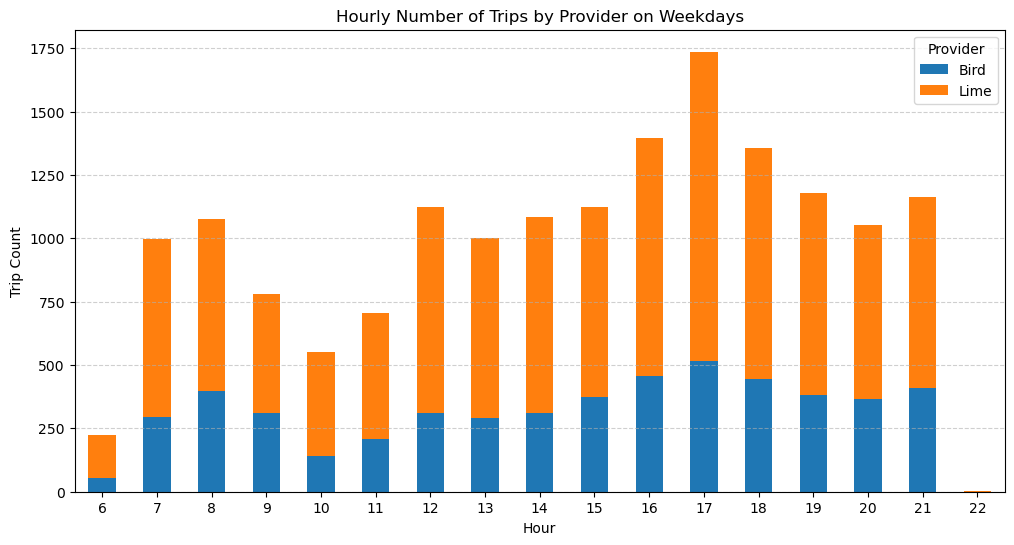

In [46]:
# Group by hour and provider, for weekdays
weekday_grouped = weekday_data.groupby(['HOUR', 'PROVIDER_NAME']).size().unstack(fill_value=0)
weekday_grouped.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Hourly Number of Trips by Provider on Weekdays')
plt.xlabel('Hour')
plt.ylabel('Trip Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Provider')
plt.xticks(rotation=0)
plt.show()


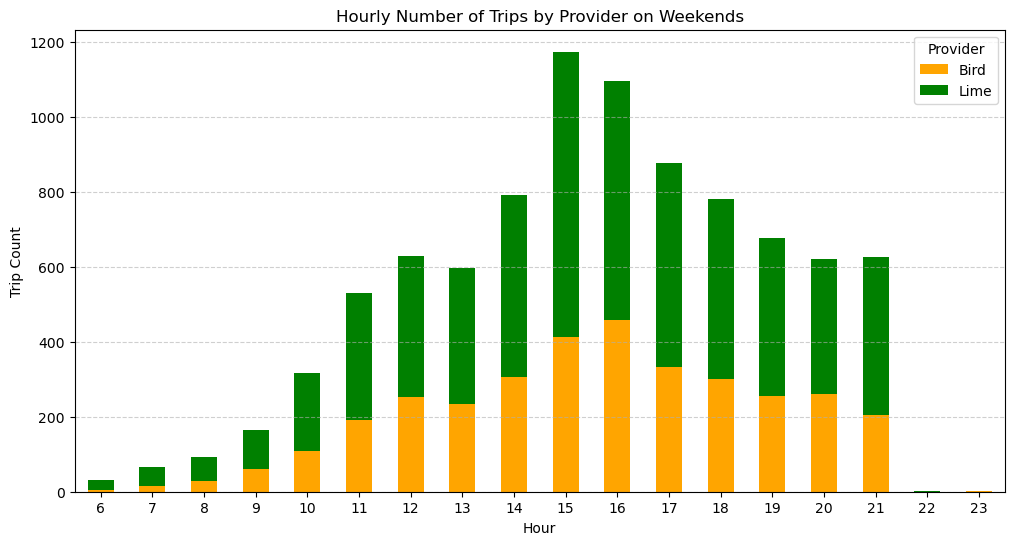

In [45]:
# Group by hour and provider, for weekends
weekend_grouped = weekend_data.groupby(['HOUR', 'PROVIDER_NAME']).size().unstack(fill_value=0)
weekend_grouped.plot(kind='bar', stacked=True, figsize=(12,6), color=['orange', 'green', 'gray'])
plt.title('Hourly Number of Trips by Provider on Weekends')
plt.xlabel('Hour')
plt.ylabel('Trip Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Provider')
plt.xticks(rotation=0)
plt.show()

In [14]:
# Average hourly trip count per provider by day type
hourly_counts = trips_df.groupby(['PROVIDER_NAME', 'DAY_TYPE', 'HOUR']).size().reset_index(name='TRIP_COUNT')

average_hourly = hourly_counts.groupby(['PROVIDER_NAME', 'DAY_TYPE'])['TRIP_COUNT'].mean().unstack().round(0)

print("📋 Average Hourly Trip Count (Rounded):")
print(average_hourly)


📋 Average Hourly Trip Count (Rounded):
DAY_TYPE       Weekday  Weekend
PROVIDER_NAME                  
Bird             329.0    202.0
Lime             664.0    332.0
